<a href="https://colab.research.google.com/github/Tina-Mulu/Carrefour-Market-Analysis-using-R-.-Unsupervised-Learning/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 3: Association Rules**

This section will require that you create association rules that will allow you to identify relationships between variables in the dataset. You are provided with a separate dataset that comprises groups of items that will be associated with others. Just like in the other sections, you will also be required to provide insights for your analysis.

In [ ]:
# We first we install the required arules library 
#
install.packages("arules")
# Loading the arules library
#
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
# Loading our transactions dataset from our csv file
path <-"http://bit.ly/SupermarketDatasetII"

trans<-read.transactions(path, sep = ",")
trans

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [ ]:
# Verifying the object's class
class(trans)

[1] "transactions"
attr(,"package")
[1] "arules"

In [ ]:
# Previewing our first 5 transactions
#
inspect(trans[1:5])

    items              
[1] {almonds,          
     antioxydant juice,
     avocado,          
     cottage cheese,   
     energy drink,     
     frozen smoothie,  
     green grapes,     
     green tea,        
     honey,            
     low fat yogurt,   
     mineral water,    
     olive oil,        
     salad,            
     salmon,           
     shrimp,           
     spinach,          
     tomato juice,     
     vegetables mix,   
     whole weat flour, 
     yams}             
[2] {burgers,          
     eggs,             
     meatballs}        
[3] {chutney}          
[4] {avocado,          
     turkey}           
[5] {energy bar,       
     green tea,        
     milk,             
     mineral water,    
     whole wheat rice} 


In [ ]:
# If we wanted to preview the items that make up our dataset,
# alternatively we can do the following
# ---
# 
items<-as.data.frame(itemLabels(trans))
colnames(items) <- "Item"
head(items, 10)

,Item
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [ ]:
# Generating a summary of the transaction dataset
# ---
# This would give us some information such as the most purchased items, 
# distribution of the item sets (no. of items purchased in each transaction), etc.
# ---
# 
summary(trans)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [ ]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 7 to 10 and performing 
# some operation in percentage terms of the total transactions 
# 
itemFrequency(trans[, 7:10],type = "absolute")
round(itemFrequency(trans[, 7:10],type = "relative")*100,2)

barbecue sauce      black tea    blueberries     body spray 
            81            107             69             86

barbecue sauce      black tea    blueberries     body spray 
          1.08           1.43           0.92           1.15

In [ ]:
# Producing a chart of frequencies and fitering 
# to consider only items with a minimum percentage 
# of support/ considering a top x of items
# ---
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))

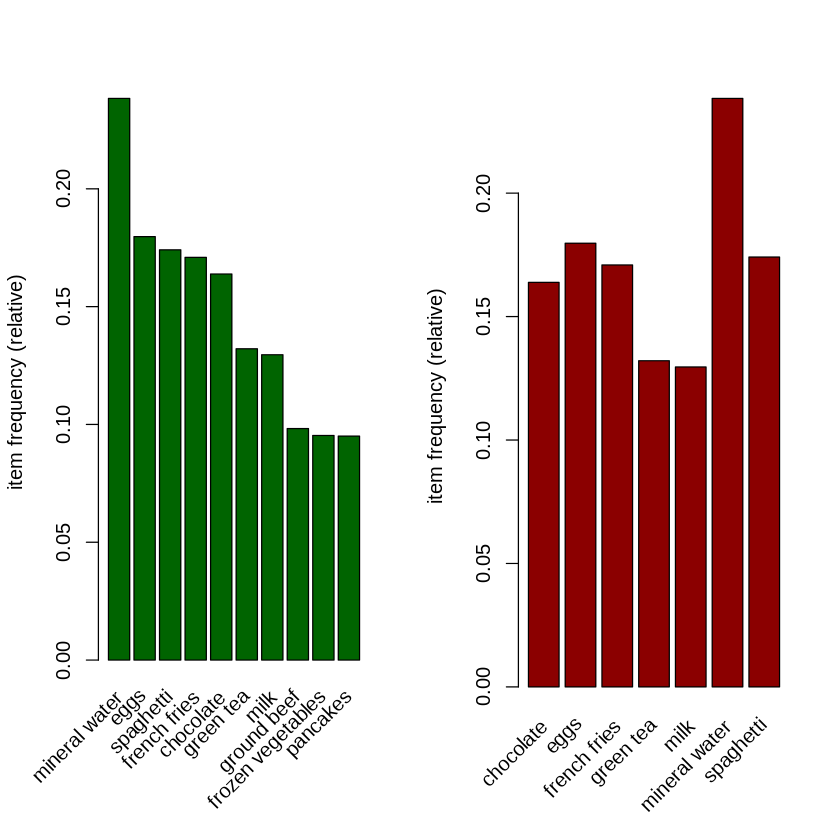

In [ ]:
# Producing a chart of frequencies and fitering 
# to consider only items with a minimum percentage 
# of support/ considering a top x of items
# ---
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))
# plot the frequency of items
itemFrequencyPlot(trans, topN = 10,col="darkgreen")
itemFrequencyPlot(trans, support = 0.1,col="darkred")

In [ ]:
# Building a model based on association rules 
# using the apriori function 
# ---
# We use Min Support as 0.001 and confidence as 0.8
# ---
# 
rules <- apriori (trans, parameter = list(supp = 0.001, conf = 0.8))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [ ]:
# We use measures of significance and interest on the rules, 
# determining which ones are interesting and which to discard.
# ---
# However since we built the model using 0.001 Min support 
# and confidence as 0.8 we obtained 410 rules.
# However, in order to illustrate the sensitivity of the model to these two parameters, 
# we will see what happens if we increase the support or lower the confidence level
# 

# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (trans,parameter = list(supp = 0.002, conf = 0.8)) 

# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (trans, parameter = list(supp = 0.001, conf = 0.6)) 

rules2

rules3

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbos

set of 2 rules 

set of 545 rules 

In [ ]:
# We can perform an exploration of our model 
# through the use of the summary function as shown
# ---
# Upon running the code, the function would give us information about the model 
# i.e. the size of rules, depending on the items that contain these rules. 
# In our above case, most rules have 3 and 4 items though some rules do have upto 6. 
# More statistical information such as support, lift and confidence is also provided.
# ---
# 
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
  data ntransactions support confidence
 trans          7501   0.001        0.8

In [ ]:
# Observing rules built in our model i.e. first 5 model rules
# ---
# 
inspect(rules[1:5])

    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


In [ ]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
# We can also use different criteria such as: (by = "lift" or by = "support")
# 
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])


    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [ ]:
# If we're interested in making a promotion relating to the sale of mineral water, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing mineral water
# ---
# 
water <- subset(rules, subset = rhs %pin% "mineral water")

In [ ]:
# Then order by confidence
water<-sort(water, by="confidence", decreasing=TRUE)
inspect(water[1:5])

    lhs                    rhs                 support confidence    coverage     lift count
[1] {ground beef,                                                                           
     light cream,                                                                           
     olive oil}         => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[2] {cake,                                                                                  
     olive oil,                                                                             
     shrimp}            => {mineral water} 0.001199840  1.0000000 0.001199840 4.195190     9
[3] {red wine,                                                                              
     soup}              => {mineral water} 0.001866418  0.9333333 0.001999733 3.915511    14
[4] {ground beef,                                                                           
     pancakes,                                                        

In [ ]:
# What if we wanted to determine items that customers might buy 
# who have previously bought water?
# ---
# 
# Subset the rules
water <- subset(rules, subset = lhs %pin% "mineral water")

# Order by confidence
water<-sort(water, by="confidence", decreasing=TRUE)
# inspect top 5
inspect(water[1:5])

    lhs                                   rhs           support     confidence
[1] {cake,meatballs,mineral water}     => {milk}        0.001066524 1.0000000 
[2] {eggs,mineral water,pasta}         => {shrimp}      0.001333156 0.9090909 
[3] {herb & pepper,mineral water,rice} => {ground beef} 0.001333156 0.9090909 
[4] {light cream,mineral water,shrimp} => {spaghetti}   0.001066524 0.8888889 
[5] {grated cheese,mineral water,rice} => {ground beef} 0.001066524 0.8888889 
    coverage    lift      count
[1] 0.001066524  7.717078  8   
[2] 0.001466471 12.722185 10   
[3] 0.001466471  9.252498 10   
[4] 0.001199840  5.105326  8   
[5] 0.001199840  9.046887  8   


from the analysis we  can see a customer who buys mineral water will also most likely buy milk, shrimp, spaghetti, ground beef. maybe they can work on arranging these goods in alignmnt at the Superarket if they want to increase their sales.